# Herausforderung: Analyse eines Textes über Data Science

In diesem Beispiel machen wir eine einfache Übung, die alle Schritte eines traditionellen Data-Science-Prozesses abdeckt. Du musst keinen Code schreiben, sondern kannst einfach auf die untenstehenden Zellen klicken, um sie auszuführen und das Ergebnis zu beobachten. Als Herausforderung wirst du ermutigt, diesen Code mit unterschiedlichen Daten auszuprobieren.

## Ziel

In dieser Lektion haben wir verschiedene Konzepte im Zusammenhang mit Data Science besprochen. Lass uns versuchen, weitere verwandte Konzepte zu entdecken, indem wir etwas **Text Mining** durchführen. Wir beginnen mit einem Text über Data Science, extrahieren Schlüsselwörter daraus und versuchen dann, das Ergebnis zu visualisieren.

Als Text verwende ich die Seite über Data Science von Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Schritt 1: Datenbeschaffung

Der erste Schritt in jedem Data-Science-Prozess ist die Beschaffung der Daten. Wir verwenden die Bibliothek `requests`, um dies zu erledigen:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Schritt 2: Daten umwandeln

Der nächste Schritt besteht darin, die Daten in eine für die Verarbeitung geeignete Form zu bringen. In unserem Fall haben wir den HTML-Quellcode von der Seite heruntergeladen und müssen ihn in einfachen Text umwandeln.

Es gibt viele Möglichkeiten, dies zu tun. Wir werden das einfachste integrierte [HTMLParser](https://docs.python.org/3/library/html.parser.html)-Objekt von Python verwenden. Dazu müssen wir die `HTMLParser`-Klasse erweitern und den Code definieren, der den gesamten Text innerhalb der HTML-Tags sammelt, mit Ausnahme der `<script>`- und `<style>`-Tags.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Schritt 3: Erkenntnisse gewinnen

Der wichtigste Schritt besteht darin, unsere Daten in eine Form zu bringen, aus der wir Erkenntnisse gewinnen können. In unserem Fall möchten wir Schlüsselwörter aus dem Text extrahieren und herausfinden, welche Schlüsselwörter aussagekräftiger sind.

Wir werden die Python-Bibliothek [RAKE](https://github.com/aneesha/RAKE) für die Schlüsselwort-Extraktion verwenden. Zunächst installieren wir diese Bibliothek, falls sie noch nicht vorhanden ist:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Die Hauptfunktionalität ist über das `Rake`-Objekt verfügbar, das wir mit einigen Parametern anpassen können. In unserem Fall setzen wir die Mindestlänge eines Schlüsselworts auf 5 Zeichen, die Mindesthäufigkeit eines Schlüsselworts im Dokument auf 3 und die maximale Anzahl von Wörtern in einem Schlüsselwort auf 2. Experimentieren Sie gerne mit anderen Werten und beobachten Sie das Ergebnis.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Wir haben eine Liste von Begriffen zusammen mit dem zugehörigen Wichtigkeitsgrad erhalten. Wie Sie sehen können, stehen die relevantesten Disziplinen, wie maschinelles Lernen und Big Data, in der Liste an den obersten Positionen.

## Schritt 4: Visualisierung des Ergebnisses

Menschen können Daten am besten in visueller Form interpretieren. Daher macht es oft Sinn, die Daten zu visualisieren, um einige Erkenntnisse zu gewinnen. Wir können die Bibliothek `matplotlib` in Python verwenden, um eine einfache Verteilung der Schlüsselwörter mit ihrer Relevanz darzustellen:


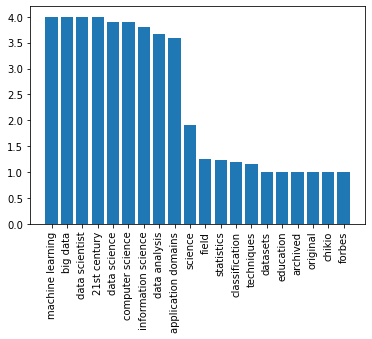

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Es gibt jedoch eine noch bessere Möglichkeit, Wortfrequenzen zu visualisieren - mit **Word Cloud**. Wir müssen eine weitere Bibliothek installieren, um die Wortwolke aus unserer Schlüsselwortliste zu erstellen.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-Objekt ist dafür verantwortlich, entweder den Originaltext oder eine vorab berechnete Liste von Wörtern mit ihren Häufigkeiten aufzunehmen und ein Bild zurückzugeben, das anschließend mit `matplotlib` angezeigt werden kann:


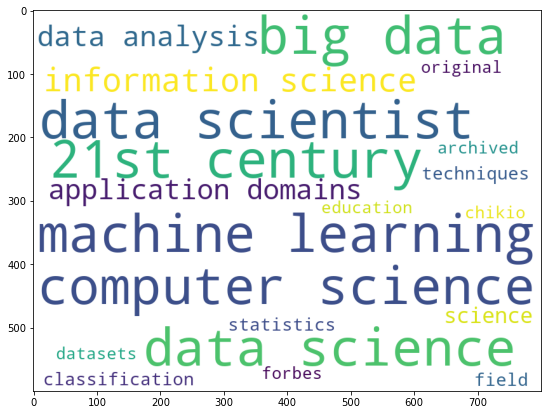

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Wir können auch den Originaltext an `WordCloud` übergeben - lassen Sie uns sehen, ob wir ein ähnliches Ergebnis erzielen können:


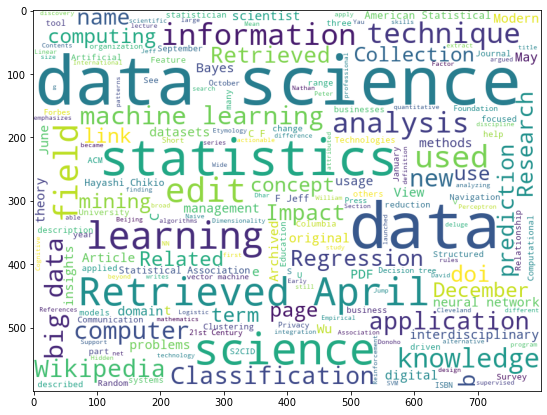

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Man sieht, dass die Wortwolke jetzt beeindruckender aussieht, aber sie enthält auch viel Rauschen (z. B. nicht verwandte Wörter wie `Retrieved on`). Außerdem erhalten wir weniger Schlüsselwörter, die aus zwei Wörtern bestehen, wie *Data Scientist* oder *Computer Science*. Dies liegt daran, dass der RAKE-Algorithmus eine viel bessere Arbeit bei der Auswahl guter Schlüsselwörter aus dem Text leistet. Dieses Beispiel verdeutlicht die Bedeutung der Datenvorverarbeitung und -bereinigung, da ein klares Bild am Ende uns ermöglicht, bessere Entscheidungen zu treffen.

In dieser Übung haben wir einen einfachen Prozess durchlaufen, um aus Wikipedia-Texten einige Bedeutungen in Form von Schlüsselwörtern und einer Wortwolke zu extrahieren. Dieses Beispiel ist recht einfach, zeigt aber gut alle typischen Schritte, die ein Data Scientist bei der Arbeit mit Daten durchführt, angefangen bei der Datenbeschaffung bis hin zur Visualisierung.

In unserem Kurs werden wir all diese Schritte im Detail besprechen.



---

**Haftungsausschluss**:  
Dieses Dokument wurde mit dem KI-Übersetzungsdienst [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, beachten Sie bitte, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
